In [1]:
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

/home/warproxxx/anaconda3/envs/meta_analyse/lib/python3.5/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
userwise_details = pd.read_csv('complete_userinfo.csv')

In [3]:
total_influence = sum(userwise_details['total_influence'])
total_influence

25609918.90357624

In [4]:
userwise_details['influence_percentage'] = (userwise_details['total_influence'] / total_influence)*100

In [5]:
userwise_details = userwise_details.sort_values('influence_percentage', ascending=False)

In [15]:
def plot_influence(tops):
    fig, ax = plt.subplots(figsize=(20,10))
    x = tops['influence_percentage'].values
    txts = tops['influence_percentage'].apply(lambda x: str(x)[:4]+"%").values
    count = 0


    def func(pct):
        nonlocal count
        curr = txts[count]
        count=count+1
        return curr

    wedges, texts, autotexts =  ax.pie(x, labels=tops['username'].values, autopct=lambda pct: func(pct), textprops={'fontsize': 14})

    for i in range(len(texts)):
        texts[i].set_fontsize(20)

        #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    plt.tight_layout()
    plt.show()

    fig.savefig('../../writeup/images/top_influences.png')

In [11]:
tops = userwise_details[:20]

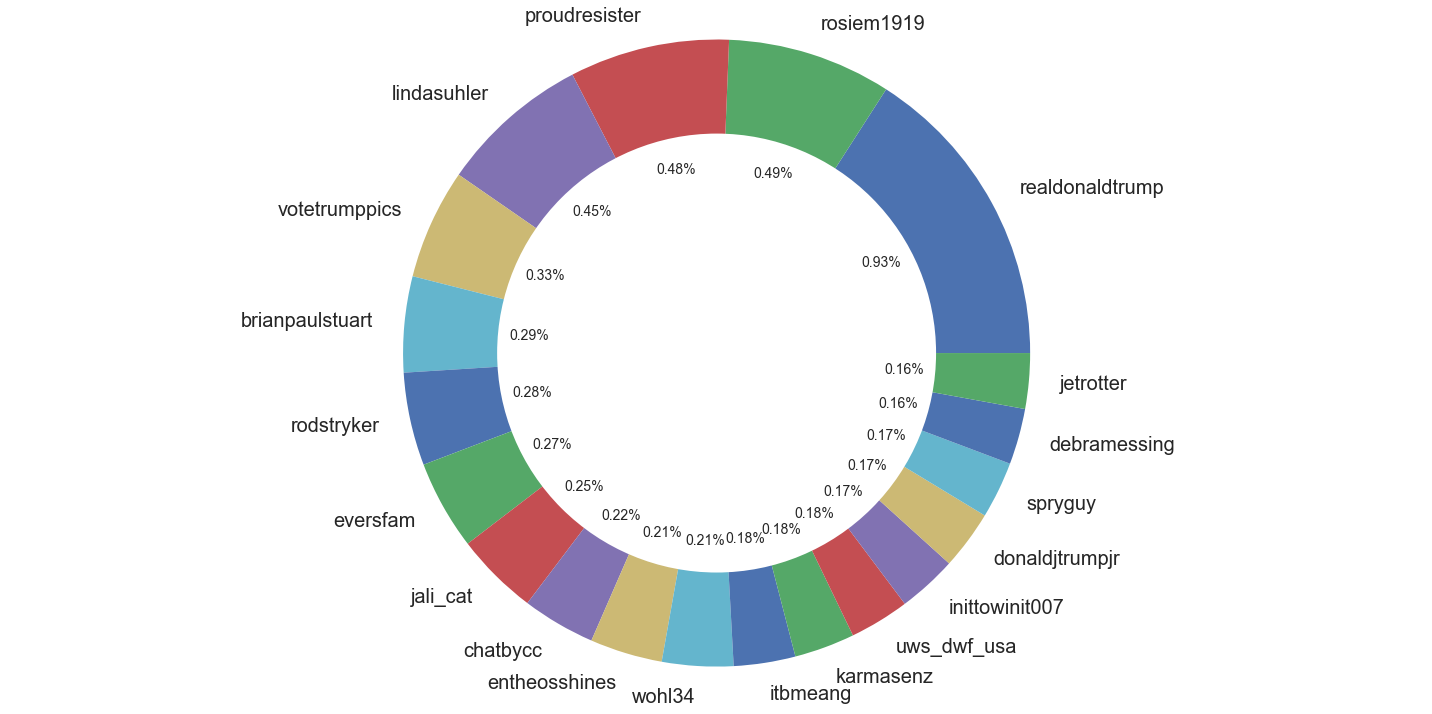

In [16]:
plot_influence(tops)

In [10]:
userwise_details = userwise_details.sort_values('total_influence', ascending=False).reset_index(drop=True)

In [11]:
def get_percentage_plot(df):
    one_percentage_contain = (sum(df[:int(len(df) * 0.01)]['total_influence'])/sum(df['total_influence']))*100
    print(one_percentage_contain)
    percentage = []
    percentages = [i for i in range(1,100,1)]
    influence = [(sum(df[:int(len(df) * (i/100))]['total_influence'])/sum(df['total_influence']))*100 for i in percentages]
    
    plt.xlabel('Influence Percentage')
    plt.ylabel('Percentage of Users')
    plt.plot(influence, percentages)

68.35949295660807


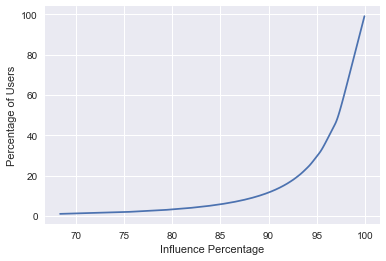

In [20]:
get_percentage_plot(userwise_details)
plt.savefig('../../writeup/images/top_1per_all.png')

In [14]:
bots = userwise_details[userwise_details['predicted'] == 1]
humans = userwise_details[userwise_details['predicted'] == 0]

In [15]:
total_bot_influence = sum(bots['total_influence'])

In [16]:
(total_bot_influence/total_influence) * 100

21.906128405799194

In [17]:
total_bot_influence #but we don't know how many of them were fellow bots. Look at the retweet to know

5610141.719638452

In [18]:
bots = bots.sort_values('total_influence', ascending=False).reset_index(drop=True)

In [19]:
one_per = bots[:int(len(bots) * 0.01)]

In [17]:
humans_reached_percentage = (sum(one_per['total_humans'])/sum(one_per['total_retweeted'])) * 100 #one_percentage humans reached
print(humans_reached_percentage)

68.31914675417906


In [25]:
responsible_for = sum(one_per['total_influence']) * (humans_reached_percentage/100) #were responsible for this
print(responsible_for) #need to create something a bit better

2863467.1923224824


In [19]:
responsible_for/total_influence #responsible for reaching 11% of the total humans in our sets

0.11181086527855502

In [20]:
sum(userwise_details['total_retweeted']) * (responsible_for/total_influence) #or as much as 480k retweets. Derive this or find a way to make this more accurate

467912.25861528737

In [21]:
(responsible_for/total_influence) #Our scenario considers influence as child reached too

0.11181086527855502

74.70951991174513


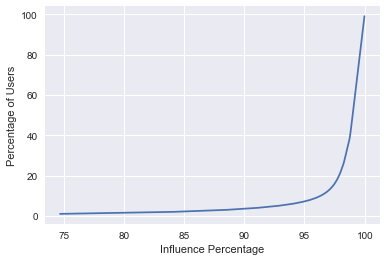

In [21]:
get_percentage_plot(bots) #now for the 1% how many were humans? Then i can find the exact influence
plt.savefig('../../writeup/images/top_1per_bots.png')

In [22]:
humans = userwise_details[userwise_details['predicted'] == 0]

In [23]:
humans = humans.sort_values('total_influence', ascending=False).reset_index(drop=True)

64.77432704905858


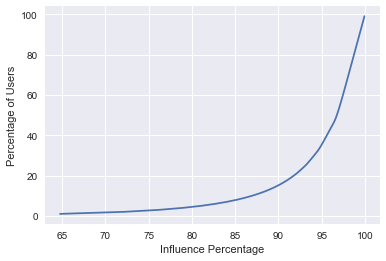

In [22]:
get_percentage_plot(humans) #We have to explain what constitudes a cascade very well
plt.savefig('../../writeup/images/top_1per_humans.png')

In [ ]:
#now work on